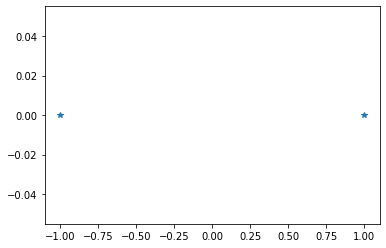

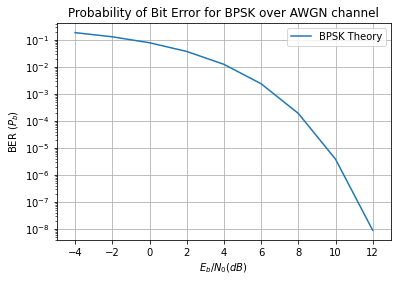

In [3]:

import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import erfc 


nSym = 10**5 
EbN0dBs = np.arange(start=-4,stop = 13, step = 2) 
BER_sim = np.zeros(len(EbN0dBs)) 

M=2 
m = np.arange(0,M)
A = 1;
constellation = A*np.cos(m/M*2*np.pi)  


inputSyms = np.random.randint(low=0, high = M, size=nSym) 
s = constellation[inputSyms] 

fig, ax1 = plt.subplots(nrows=1,ncols = 1)
ax1.plot(np.real(constellation),np.imag(constellation),'*')


for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10) 
    P=sum(abs(s)**2)/len(s) 
    N0=P/gamma 
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # computed noise vector
    r = s + n 
    

detectedSyms = (r <= 0).astype(int) 
BER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym 

BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();plt.show()


